In [5]:
# Import modules
import pandas as pd
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# change the visualization style to a base Seaborn style
%matplotlib inline
sns.set() 

# Import test and train datasets
df_train = pd.read_csv('./kaggle_data/train.csv')
df_test = pd.read_csv('./kaggle_data/test.csv')


In [6]:
# View first lines of training data
df_train.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


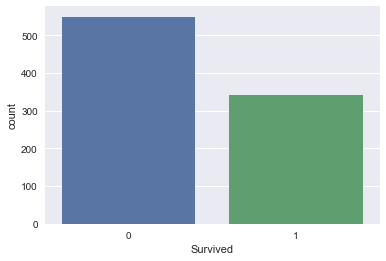

In [8]:
sns.countplot(x='Survived', data=df_train)

In [9]:
# Create a column 'Survived' for df_test that encodes 'did not survive' for all rows;
df_test['Survived'] = 0
# Save 'PassengerId' and 'Survived' columns of df_test to a .csv 
df_test[['PassengerId', 'Survived']].to_csv('./kaggle_data/predictions/no_survivors.csv', index=False)

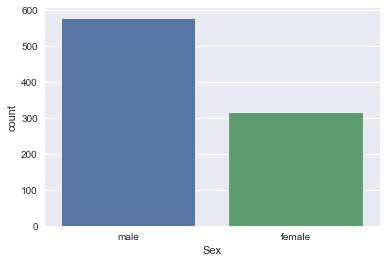

In [11]:
sns.countplot(x='Sex', data=df_train)

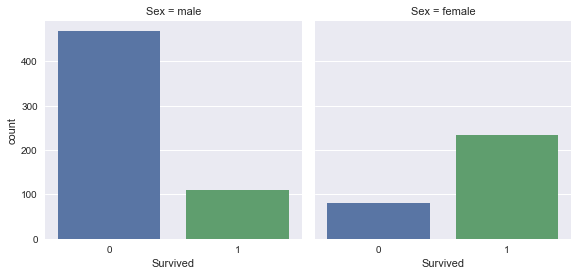

In [15]:
# split (faceted) over the feature 'Sex'
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)

In [14]:
# how many women and how many men survived
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [18]:
print(df_train[df_train.Sex == 'female'].Survived.sum()/df_train[df_train.Sex == 'female'].Survived.count())
print(df_train[df_train.Sex == 'male'].Survived.sum()/df_train[df_train.Sex == 'male'].Survived.count())
# 74% of women survived, while 19% of men survived.

0.742038216561
0.188908145581


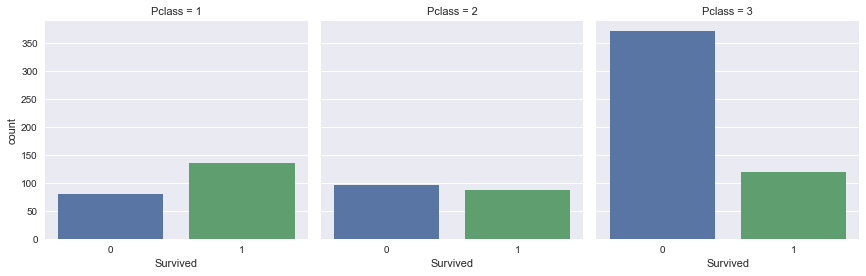

In [19]:
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train)

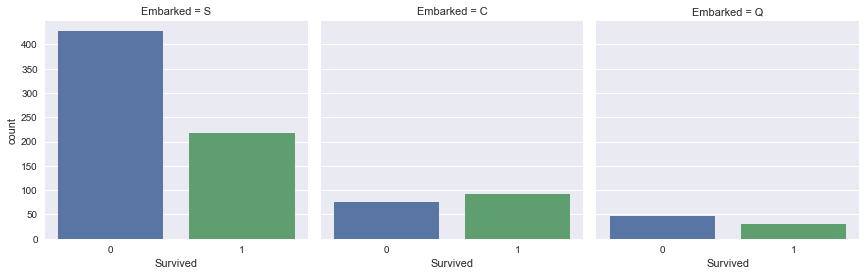

In [21]:
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train)
# Passengers that embarked in Southampton were less likely to survive. 

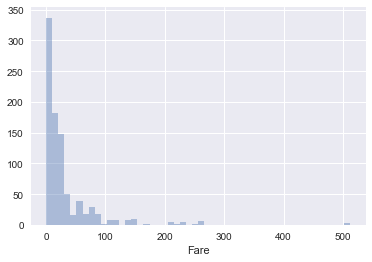

In [22]:
sns.distplot(df_train.Fare, kde=False);

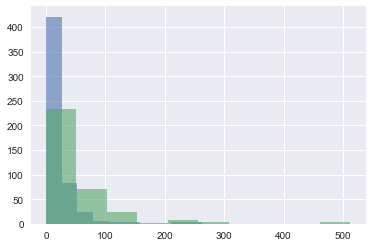

In [26]:
df_train.groupby('Survived').Fare.hist(alpha=0.6);
#  paid more had a higher chance of surviving.

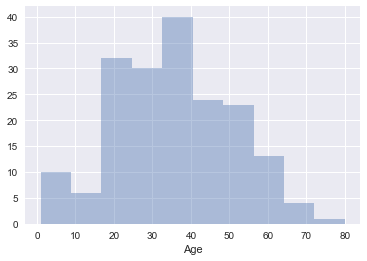

In [25]:
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

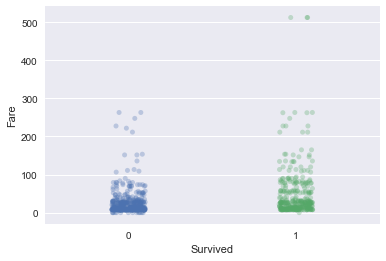

In [27]:
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True);

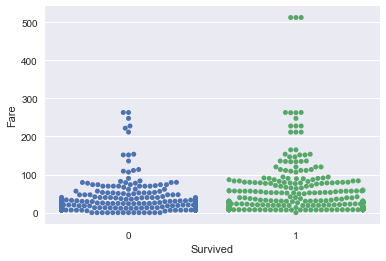

In [28]:
sns.swarmplot(x='Survived', y='Fare', data=df_train);